<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1.-Импорт-библиотек">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>
                    Импорт библиотек
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2.-Подготовка-данных">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#3.-Оптимизация-тестовых-функций">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>
                    Оптимизация тестовых функций
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#3.1.-Функция-Изома">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>
                            Функция Изома
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#3.2.-Функция-Растригина">
                            <span class="toc-item-num">3.2.&nbsp;&nbsp;</span>
                            Функция Растригина
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#4.-Оптимизация-модели-машинного-обучения">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>
                    Оптимизация модели машинного обучения
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#5.-Общий-вывод">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №4: Optuna

**Задача 1:** найти минимум тестовых функций для оптимизации с помощью `optuna`.

**Задача 2:** подобрать гиперпараметры модели машинного обучения. 

**Источники данных:** 1) сгенерированный набор точек; 2) набор данных [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) из библиотеки `sklearn`.

**Описание данных:** набор данных содержит информацию о винах для задачи классификации.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 1. Импорт библиотек

Установка необходимых библиотек:

In [1]:
# !pip install optuna

Импорт всех необходимых библиотек:

In [2]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np

import optuna
import logging
import sys
import math

from matplotlib import pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from optuna.visualization import plot_contour, \
                                 plot_edf, \
                                 plot_slice, \
                                 plot_optimization_history, \
                                 plot_parallel_coordinate, \
                                 plot_param_importances

from utils.plot_charts import *

Внутрипроектный модуль `plot_charts` включает в себя следующие функциии, необходимые для выполнения задач:

* `create_gif` - получение gif из фреймов графиков с полученными шагами поиска минимума

* `create_frame_2d` - построение двумерного статичного графика с шагами поиска минимума

* `create_frame_3d` - построение трёхмерного статичного графика с шагами поиска минимума

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 2. Подготовка данных 

Задание множества точек:

In [3]:
x_linear = np.linspace(-5, 5, 1000)
y_linear = np.linspace(-5, 5, 1000)

Инициализация генератора псевдослучайных чисел:

In [4]:
SEED = 42
np.random.seed(SEED)

Задание функции, выводящей значения найденного минимума:

In [5]:
def print_min(x: float, y: float, z: float):
    print(f'Got to the min:\nx: {x}\ny: {y}\nz: {z}')

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 3. Оптимизация тестовых функций

### 3.1. Функция Изома

Задание функции Изома:

In [6]:
def izom_loss(x, y):
    return -np.cos(x) * np.cos(x) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2))

Задание функции для оптимизации:

In [7]:
def objective_izom(trial):
    x = trial.suggest_float('x', -5, 5)
    y = trial.suggest_float('y', -5, 5)
    
    return izom_loss(x, y)

Создание новой задачи оптимизации:

In [8]:
study = optuna.create_study()

[I 2022-11-24 01:46:53,975] A new study created in memory with name: no-name-0cedca01-9ecd-4791-839c-ec272add73bd


Оптимизация:

In [ ]:
study.optimize(objective_izom, n_trials=200)

Сохранение координат вычисленного минимума:

In [10]:
best_params = study.best_params

x_found = best_params['x']
y_found = best_params['y']

Выведение на экран полученного минимума:

In [11]:
print_min(x_found, y_found, izom_loss(x_found, y_found))

Got to the min:
x: 3.150137587852466
y: 3.144392277038455
z: -0.999846141254339


Сохранение полученных координат поиска минимума:

In [12]:
izom_grads = np.array([list(trial.params.values()) for trial in study.trials])

Сохранение процесса поиска минимума в формате .gif:

In [ ]:
# create_gif(x_linear, y_linear, izom_loss, izom_grads, 
#            'Izom function', 'Optuna Search', 'izom_min',
#            [x_found, y_found], create_frame_3d)

Ссылка на .gif-изображение: https://github.com/tidalinn/mai_term01_artificial_intelligence_course/blob/main/gifs/izom_min.gif

>**Вывод**
>
>В ходе оптимизации поиска минимума функции Изома с помощью `optuna` была подтверждена эффективность применения алгоритма.

<div style="height: 2px; background-color: blue; opacity: 0.2; margin: 10px 0;"></div>

### 3.2. Функция Растригина

Задание функции Растригина:

In [14]:
def rastrigin_loss(*X, A: int = 10):
    return A + sum([(x ** 2 - A * np.cos(2 * np.pi * x)) for x in X])

Задание функции для оптимизации:

In [15]:
def objective_rastrigin(trial):
    x = trial.suggest_float('x', -5, 5)
    y = trial.suggest_float('y', -5, 5)
    
    return rastrigin_loss(x)

Создание новой задачи оптимизации:

In [16]:
study = optuna.create_study()

[I 2022-11-24 01:46:55,565] A new study created in memory with name: no-name-57e31f39-f506-4a07-811d-00bc00306c15


Оптимизация:

In [ ]:
study.optimize(objective_rastrigin, n_trials=100)

Сохранение координат вычисленного минимума:

In [18]:
best_params = study.best_params

x_found = best_params['x']
y_found = best_params['y']

Выведение на экран полученного минимума:

In [19]:
print_min(x_found, y_found, rastrigin_loss(x_found, y_found))

Got to the min:
x: 0.010065882908090296
y: -0.3073353903822059
z: 3.6396213655732828


Сохранение полученных координат поиска минимума:

In [20]:
rastrigin_grads = np.array([list(trial.params.values()) for trial in study.trials])

Сохранение процесса поиска минимума в формате .gif:

In [ ]:
# create_gif(x_linear, y_linear, rastrigin_loss, rastrigin_grads, 
#            'Rastrigin function', 'Optuna Search', 'rastrigin_min',
#            [x_found, y_found], create_frame_2d)

Ссылка на .gif-изображение: https://github.com/tidalinn/mai_term01_artificial_intelligence_course/blob/main/gifs/rastrigin_min.gif

>**Вывод**
>
>В ходе оптимизации поиска минимума функции Растригина с помощью `optuna` была подтверждена эффективность применения алгоритма.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 4. Оптимизация модели машинного обучения

Поскольку набор данных о винах предполагает решение задачи классификации, в качестве модели машинного обучения будет взята Логистическая регрессия. Для нахождения наилучшей комбинации гиперпараметров в функцию для оптимизации будут переданы разные варианты их значений.

Сохранение набора данных и разделение его на выборки:

In [21]:
data, target = load_wine(return_X_y=True)
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)

Задание функции для оптимизации:

In [22]:
def objective(trial):
    
    tol = trial.suggest_float('tol', 1e-5, 1e-1)
    C = trial.suggest_float('C', 1e-5, 1)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_float('max_iter', 100, 1000)
    
    clf = LogisticRegression(tol=tol, 
                             C=C, 
                             solver=solver, 
                             max_iter=max_iter)
    
    for step in range(100):
        clf.fit(train_x, train_y) 
        intermediate_value = clf.score(valid_x, valid_y)
        trial.report(intermediate_value, step=step)
        
        if trial.should_prune():
            raise optuna.TrialPruned()
        
        return clf.score(valid_x, valid_y)

Создание новой задачи оптимизации:

In [23]:
optuna.logging.get_logger('optuna').addHandler(logging.StreamHandler(sys.stdout))

study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

[I 2022-11-24 01:47:12,071] A new study created in memory with name: no-name-af1c7a49-0951-40bc-a63c-f009e9b00cd0


A new study created in memory with name: no-name-af1c7a49-0951-40bc-a63c-f009e9b00cd0


Оптимизация:

In [ ]:
study.optimize(objective, n_trials=30)

Выведение на экран графика истории оптимизации на всех итерациях:

In [ ]:
plot_optimization_history(study)

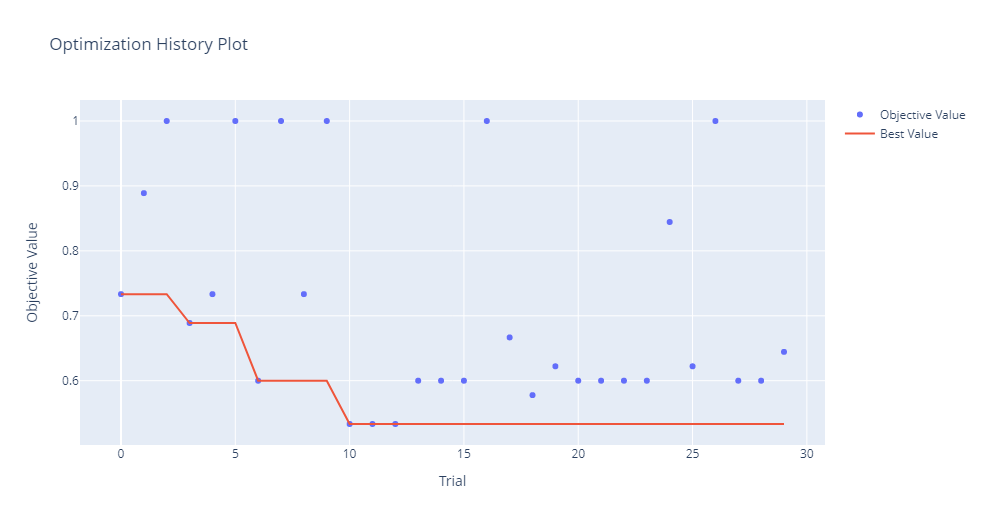

>Заметна динамика снижения лучших параметров по ходу увеличения количества итераций.

Выведение на экран графика взаимоотношений гиперпараметров:

In [ ]:
plot_parallel_coordinate(study)

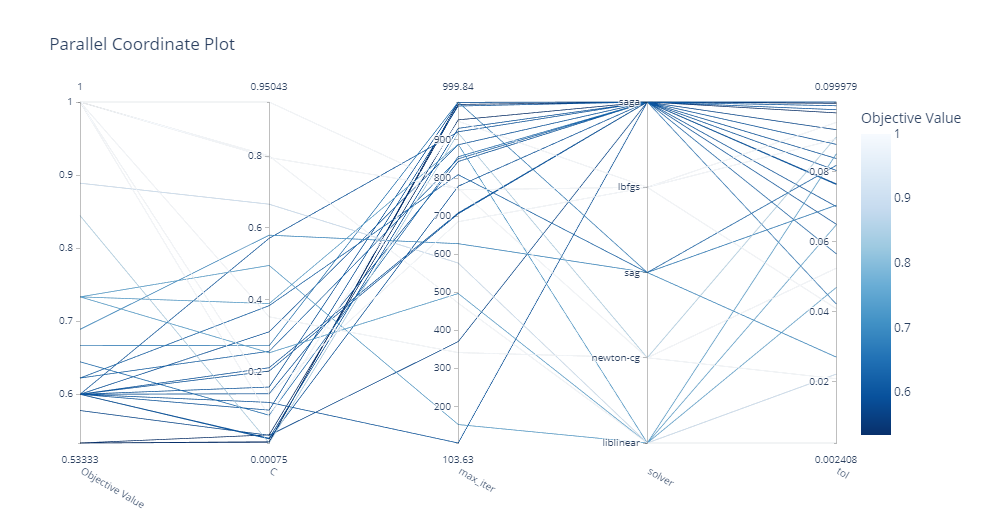

>Наибольшее число зависимостей показал `solver` `saga` при максимальном количестве итераций более `800`, а также значении гиперпараметра `C` в диапазоне от `0.4` до `0.8` при значении гиперпараметра `tol` более `0.08` и менее `0.06`.

Выведение на экран графика значимости признаков:

In [ ]:
plot_param_importances(study)

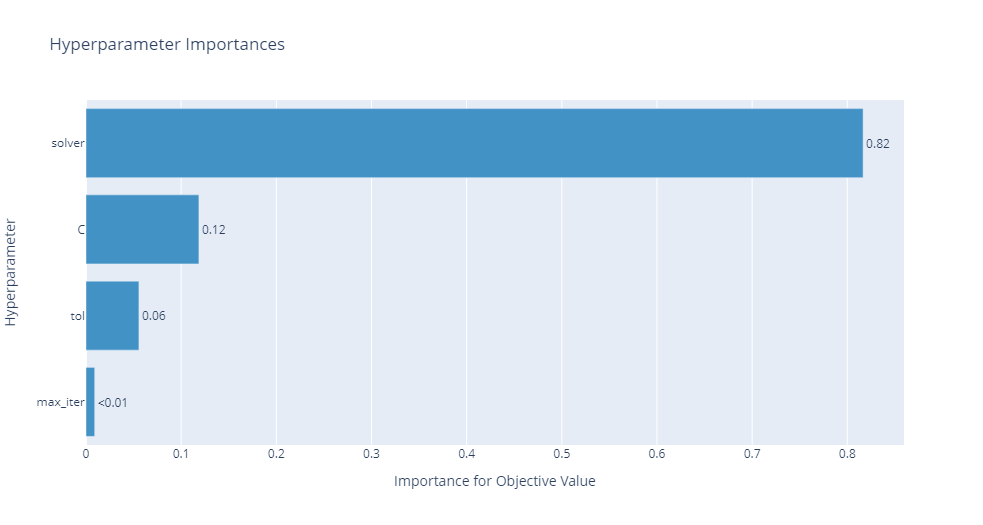

>Наибольшую значимость показал параметр `solver`, а также параметр `C`.

Выведение на экран графика взаимозависимостей гиперпараметров: 

In [ ]:
plot_contour(study)

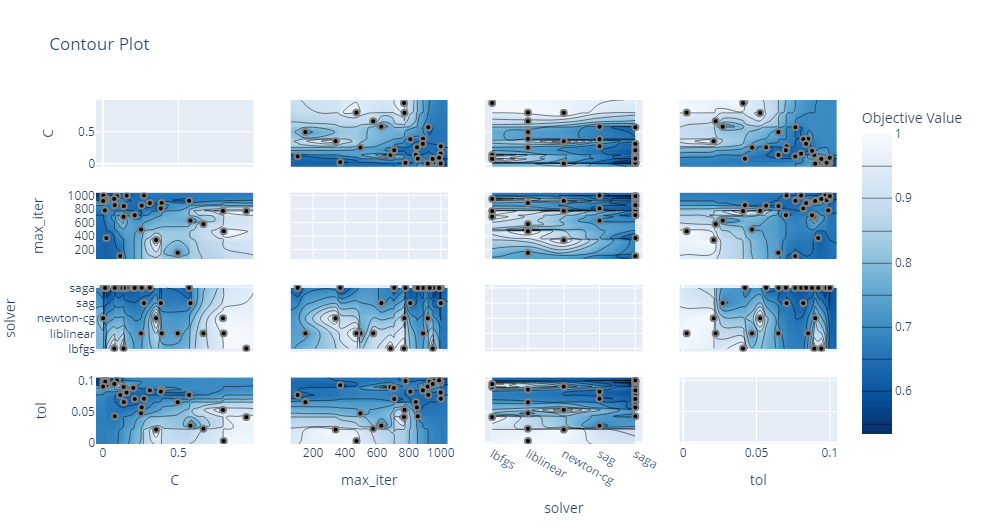

>Наблюдается зависимость параметра `C` от `tol` и параметров `C` и `tol` от `max_iters`.

Выведение на экран графика зависимостей гиперпараметров от исходного значения:

In [ ]:
plot_slice(study)

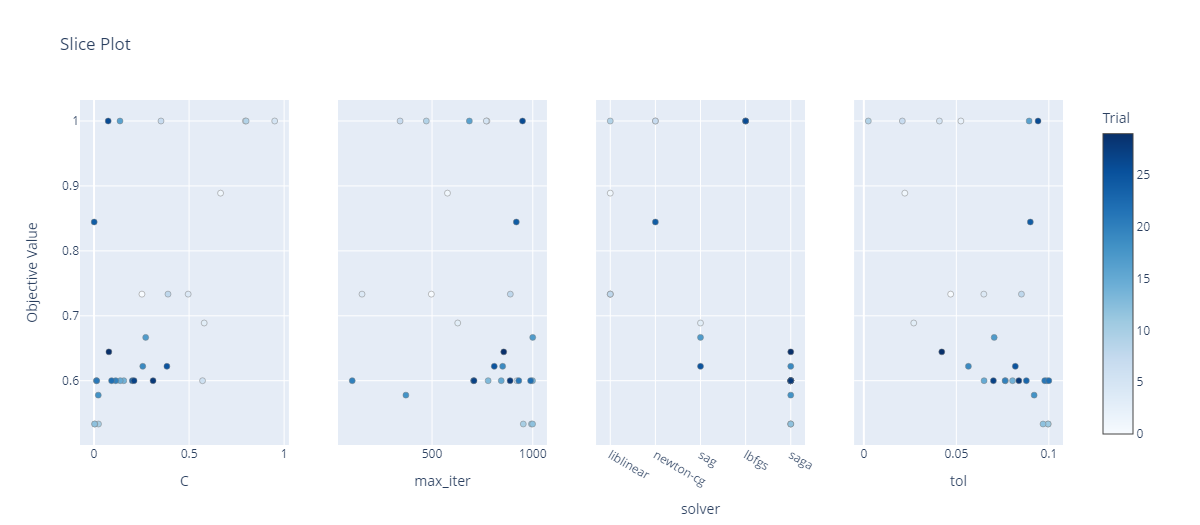

>Все гиперпараметры имеют различимые сдвиги при исходных значениях менее `0.7`. Гиперпараметр `C` тяготеет к значению в районе `0.5`. При этом максимальное число итераций возрастает, а в параметре `solver` заметно выделяется `saga`. Гиперпараметр `tol` располагает наибольшим распределением значений в диапазоне от `0.05` до `0.1`.

Выведение на экран графика эмпирической функции распределения:

\* **Эмпирическая функция распределения** - определяет для каждого значения $ x $ частоту событий $ X < x $. 

In [ ]:
plot_edf(study)

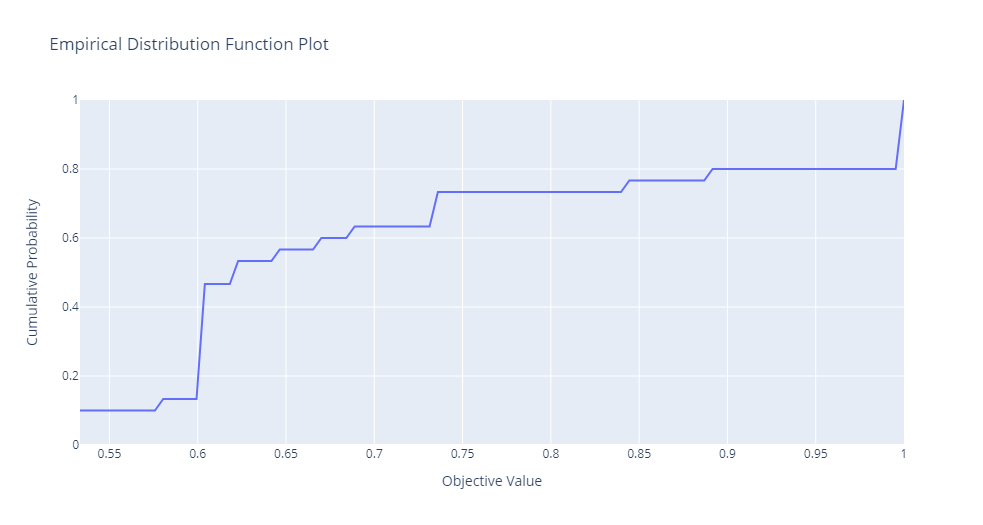

>Начиная с предела значения кумулятивной вероятности `0.7` вероятность исходных значений стремится к единице.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 5. Общий вывод

С помощью `optuna` выполнена реализация:

* Поиска минимума тестовых функций для оптимизации.

* Подобраны гиперпараметры модели классификации (Логистической регрессии).

Реализация включает в себя демонстрацию работы алгоритмов как на сгенерированных точках, так и на тестовом наборе данных из библиотеки `sklearn`.

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх к содержанию ↑
    </a>
</div>